# This notebook explores the 10m u and v components of month-averages of wind velocity between 2000 and the end of 2020 from 
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview. \
Citation:\
Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2023): ERA5 monthly averaged data on single levels from 1940 to present. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), DOI: 10.24381/cds.f17050d7 (Accessed on 19-05-2024)

In [1]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters') # directory

In [59]:
# dependencies
import pygrib
import numpy as np
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# load data:
wind_data = pygrib.open('ERA5_wind.grib')

In [4]:
# let's average all 21 years of data

# get total length of data
count = int(len(list(wind_data)) / 2) # divide by 2 to index u and v simultaneously

lats = wind_data.select(shortName='10u')[0].data()[1]
lons = wind_data.select(shortName='10u')[0].data()[2]

u_winds = [wind_data.select(shortName='10u')[i].data()[0] for i in range(count)]
v_winds = [wind_data.select(shortName='10v')[i].data()[0] for i in range(count)]

wind_data.close()

In [32]:
# save as CSV
# put into DataFrame
u_winds_df_list = [pd.DataFrame(array) for array in u_winds]
v_winds_df_list = [pd.DataFrame(array) for array in v_winds]

# concatenate along columns
u_winds_df = pd.concat(u_winds_df_list, axis=1)
v_winds_df = pd.concat(v_winds_df_list, axis=1)

# save as CSV
u_winds_df.to_csv('u_winds_df.csv', index=False)
v_winds_df.to_csv('v_winds_df.csv', index=False)

In [38]:
# take the mean across the 252 months 
avg_u_winds = pd.DataFrame(u_winds_df.values.reshape(721, 252, 1440).mean(axis=1))
avg_v_winds = pd.DataFrame(v_winds_df.values.reshape(721, 252, 1440).mean(axis=1))

In [ ]:
# save as CSV
u_winds_df.to_csv('u_winds_df.csv', index=False)
v_winds_df.to_csv('v_winds_df.csv', index=False)

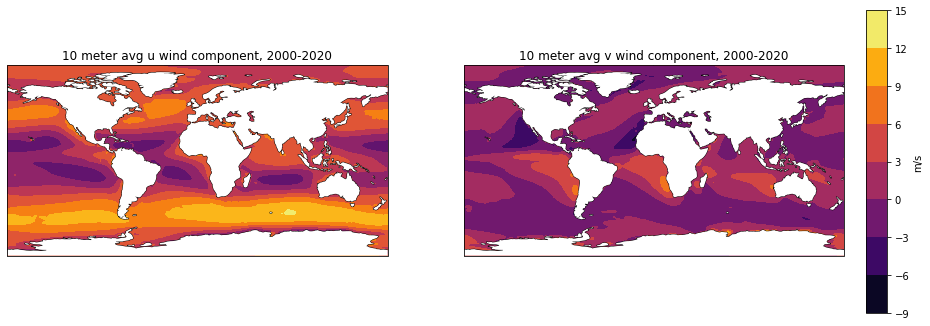

In [64]:
# Create the figure and the axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6),
                               subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

# Plot the u-component of wind
ax1.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
im1 = ax1.contourf(lons, lats, avg_u_winds, cmap='inferno', transform=ccrs.PlateCarree())
ax1.set_title('10 meter avg u wind component, 2000-2020')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ax1.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax1.add_feature(land_feature)

# Plot the v-component of wind
ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
im2 = ax2.contourf(lons, lats, avg_v_winds, cmap='inferno', transform=ccrs.PlateCarree())
ax2.set_title('10 meter avg v wind component, 2000-2020')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

ax2.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax2.add_feature(land_feature)

# Create a single colorbar for both plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im2, cax=cbar_ax, label='m/s')

# Adjust layout
plt.subplots_adjust(wspace=0.2, right=0.9)  # wspace for width space, right to make space for colorbar

# Show the plot
plt.show()